In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Crix Calculation

From the published paper:
$$\text{CRIX}_t(k, \beta) = \frac{\sum_{i=1}^k
\beta_{i,0}P_{it}Q_{i,t_l^-}}
{\text{Divisor}_{t_l^-}(k, \beta)}$$

$$
\text{Divisor}_{0}(k, \beta) = \frac{\sum_{i=1}^k
\beta_{i,0}P_{i0}Q_{i,0}}
{\text{Starting Value}},
$$

$\text{Divisor}_{t_l^-}(k, \beta)$ is not described in the original paper. 


## Self-financing CRIX
We use the "weight" given by Ilyas to calculate a self-financing CRIX. 
The starting value is 1,000, meaning the initial investment to the portfolio of cryptos is 1,000 USD. 
The 1,000 USD is used to purchase constitutents with the opening price of the period. 





In [2]:
weights = pd.read_csv('CRIX_weights.csv')
columns = weights.columns
weights.columns = ['Date'] + list(columns[1:])
weights.Date = pd.to_datetime(weights.Date)
weights.index= weights.Date
weights.drop_duplicates(['btc', 'eth'], inplace=True)
weights = weights.drop('Date', axis=1)

# weights = weights.loc[(weights.index >= '20180530') & (weights.index <= '20210530') ,:] # start day = 20180601 and end day = 20210530

In [3]:
weights

,btc,eth,xrp,ltc,xmr,bch,link,eos,bnb,xem,ada,dot,etc,bsv,dash
Date,,,,,,,,,,,,,,,
2017-01-01,0.915006,0.046713,0.016231,0.013354,0.008695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,0.907009,0.055090,0.014777,0.012244,0.010880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,0.910142,0.058563,0.011792,0.010228,0.009274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,0.812525,0.138122,0.013787,NaN,0.011359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024208
2017-05-01,0.734997,0.173260,0.050113,0.022174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019455
2017-06-01,0.573130,0.214637,0.161500,0.024974,NaN,NaN,NaN,NaN,NaN,0.025758,NaN,NaN,NaN,NaN,NaN
2017-07-01,0.502442,0.328128,0.126422,0.022172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020836,NaN,NaN
2017-08-01,0.563154,0.280802,0.104028,0.031597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020419,NaN,NaN
2017-09-01,0.597184,0.268423,0.069563,0.024907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coins = list(weights.columns)

In [5]:
def get_monthly_price(df, y,m):
    _id = (df.index.year == y) & (df.index.month==m)
    return df.loc[_id,:]

In [6]:
y_arr = weights.index.year
m_arr = weights.index.month

In [7]:
def read_price(path, coin):
    ls = os.listdir(path)
    for l in ls:
        if l.endswith(coin+'.csv'):
            df = pd.read_csv(path+l)
            df.index = pd.to_datetime(df.date)
            try:
                df.index = df.index.tz_localize('utc')
            except:
#                 print('already tz aware')
                pass
            df = df.loc[:,['open', 'high', 'low', 'close']]
            return df

In [8]:
last_month_last_value = 1000 #starting value

CRIX_arr = []

for i in range(len(y_arr)):
    print(i, y_arr[i], m_arr[i], last_month_last_value)
    
    w = get_monthly_price(weights, y_arr[i], m_arr[i])

    btc = read_price('prices/', 'btc')
    btc = get_monthly_price(btc, y_arr[i],m_arr[i])

    CRIX = w.loc[:,'btc'].values[0]*btc/btc.iloc[0,:]
    print('btc', w.loc[:,'btc'].values[0])
    for c in coins[1:]:
        if w.loc[:,c].values[0] > 0:
            print(c, w.loc[:,c].values[0])
            df = read_price('prices/', c)
            df = get_monthly_price(df, y_arr[i],m_arr[i])
            CRIX += w.loc[:,c].values[0]*df/df.iloc[0,:]
            if np.sum(np.sum(CRIX.isna()))>0:
                print(c, y_arr[i], m_arr[i], 'missing value!')

    CRIX *= last_month_last_value   
    CRIX.dropna(inplace=True)
    last_month_last_value = np.array(CRIX.iloc[-1,-1])
    
    CRIX_arr.append(CRIX)

0 2017 1 1000


IndexError: single positional indexer is out-of-bounds

In [10]:
btc

,open,high,low,close
date,,,,


In [571]:
df*np.array(CRIX.iloc[-1,:])

,open,high,low,close
date,,,,
2021-05-01 00:00:00+00:00,5484.511663,5593.737821,5480.922133,5564.834709
2021-05-01 01:00:00+00:00,5445.994911,5580.433489,5383.233600,5551.399603
2021-05-01 02:00:00+00:00,5458.527100,5681.849702,5445.548729,5591.890133
2021-05-01 03:00:00+00:00,5500.202790,5655.161961,5507.739807,5631.166581
2021-05-01 04:00:00+00:00,5536.863270,5653.433182,5483.574474,5597.131817
...,...,...,...,...
2021-05-31 19:00:00+00:00,6678.127913,6873.259490,6685.270517,6847.892741
2021-05-31 20:00:00+00:00,6733.667837,6929.061554,6725.541563,6875.339741
2021-05-31 21:00:00+00:00,6762.586857,6980.005547,6770.562822,6932.906252


In [538]:
CRIX_arr[0]

,open,high,low,close
date,,,,
2018-06-01 00:00:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000
2018-06-01 01:00:00+00:00,1002.622591,1002.841953,998.053429,999.883627
2018-06-01 02:00:00+00:00,999.367247,1004.437086,994.836309,998.333620
2018-06-01 03:00:00+00:00,997.687403,1001.429780,992.793990,998.370964
2018-06-01 04:00:00+00:00,997.823915,998.533116,992.928958,996.279824
...,...,...,...,...
2018-06-30 19:00:00+00:00,797.242059,799.789728,795.558278,798.407951
2018-06-30 20:00:00+00:00,798.696388,805.764985,797.400224,803.740857
2018-06-30 21:00:00+00:00,803.545286,804.814586,800.195730,800.366517


In [539]:
CRIX_arr[1]

,open,high,low,close
date,,,,
2018-07-01 00:00:00+00:00,811.011400,811.011400,811.011400,811.011400
2018-07-01 01:00:00+00:00,807.504397,807.363678,799.260504,804.311465
2018-07-01 02:00:00+00:00,804.443374,805.461960,800.898331,802.467294
2018-07-01 03:00:00+00:00,802.619830,804.367951,801.519334,802.870522
2018-07-01 04:00:00+00:00,802.582027,804.651137,800.808428,804.603929
...,...,...,...,...
2018-07-31 19:00:00+00:00,887.797368,890.021414,885.830916,889.327791
2018-07-31 20:00:00+00:00,887.776941,888.061105,880.129827,882.195888
2018-07-31 21:00:00+00:00,882.484571,885.307957,881.691940,883.823883


In [525]:
CRIX = pd.concat(CRIX_arr, axis=0)

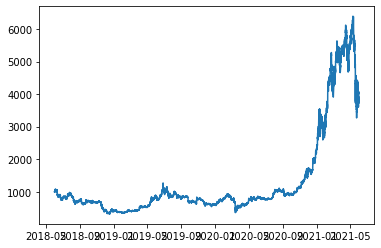

In [524]:
import matplotlib.pyplot as plt

plt.plot(pd.concat(CRIX_arr, axis=0).open)

In [526]:
CRIX.to_csv('CRIX_hourly_Tiingo.csv')

In [529]:
CRIX.index

DatetimeIndex(['2018-06-01 00:00:00+00:00', '2018-06-01 01:00:00+00:00',
               '2018-06-01 02:00:00+00:00', '2018-06-01 03:00:00+00:00',
               '2018-06-01 04:00:00+00:00', '2018-06-01 05:00:00+00:00',
               '2018-06-01 06:00:00+00:00', '2018-06-01 07:00:00+00:00',
               '2018-06-01 08:00:00+00:00', '2018-06-01 09:00:00+00:00',
               ...
               '2021-05-31 14:00:00+00:00', '2021-05-31 15:00:00+00:00',
               '2021-05-31 16:00:00+00:00', '2021-05-31 17:00:00+00:00',
               '2021-05-31 18:00:00+00:00', '2021-05-31 19:00:00+00:00',
               '2021-05-31 20:00:00+00:00', '2021-05-31 21:00:00+00:00',
               '2021-05-31 22:00:00+00:00', '2021-05-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=26033, freq=None)

In [533]:
import os
os

<module 'os' from '/Users/francis/opt/anaconda3/lib/python3.7/os.py'>